<a href="https://colab.research.google.com/github/RevazRevazashvili/DataScience_learning/blob/main/titanic_survivors_using_linear_regression_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
raw_data = pd.read_csv('train.csv')

# Explore Samples

In [3]:
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Preprocess Data

Explore samples with missing labels

In [4]:
raw_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
print(f"{round(raw_data.Age.isna().sum()/raw_data.shape[0] * 100.0, 2)}% missing age data")

19.87% missing age data


In [6]:
nans = np.where(raw_data.Age.isna())[0]
nans

array([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,  45,  46,  47,
        48,  55,  64,  65,  76,  77,  82,  87,  95, 101, 107, 109, 121,
       126, 128, 140, 154, 158, 159, 166, 168, 176, 180, 181, 185, 186,
       196, 198, 201, 214, 223, 229, 235, 240, 241, 250, 256, 260, 264,
       270, 274, 277, 284, 295, 298, 300, 301, 303, 304, 306, 324, 330,
       334, 335, 347, 351, 354, 358, 359, 364, 367, 368, 375, 384, 388,
       409, 410, 411, 413, 415, 420, 425, 428, 431, 444, 451, 454, 457,
       459, 464, 466, 468, 470, 475, 481, 485, 490, 495, 497, 502, 507,
       511, 517, 522, 524, 527, 531, 533, 538, 547, 552, 557, 560, 563,
       564, 568, 573, 578, 584, 589, 593, 596, 598, 601, 602, 611, 612,
       613, 629, 633, 639, 643, 648, 650, 653, 656, 667, 669, 674, 680,
       692, 697, 709, 711, 718, 727, 732, 738, 739, 740, 760, 766, 768,
       773, 776, 778, 783, 790, 792, 793, 815, 825, 826, 828, 832, 837,
       839, 846, 849, 859, 863, 868, 878, 888])

handling missing value

In [7]:
for i in nans:
  raw_data.Age[i] = raw_data.Age.mean()

<ipython-input-7-6a949e8a9921>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data.Age[i] = raw_data.Age.mean()


In [8]:
print(f"{round(raw_data.Age.isna().sum()/raw_data.shape[0] * 100.0, 2)}% missing age data")

0.0% missing age data


In [9]:
raw_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
stats.trim_mean(raw_data.Age, 0.1)

29.247186288260043

gender counts

In [11]:
sex_counts = raw_data['Sex'].value_counts(normalize=True)
sex_counts

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [12]:
raw_data['Sex'] = raw_data['Sex'].astype('category')
raw_data['Sex'] = raw_data['Sex'].cat.codes

In [38]:
raw_data['Ticket'] = raw_data['Ticket'].astype('category')
raw_data['Ticket'] = raw_data['Ticket'].cat.codes
raw_data['Cabin'] = raw_data['Cabin'].astype('category')
raw_data['Cabin'] = raw_data['Cabin'].cat.codes
raw_data['Embarked'] = raw_data['Embarked'].astype('category')
raw_data['Embarked'] = raw_data['Embarked'].cat.codes

In [39]:
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,523,7.2500,-1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,596,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,669,7.9250,-1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,49,53.1000,55,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,472,8.0500,-1,2


In [48]:
columns_dr = ['PassengerId', 'Name','Survived']
X = raw_data.drop(columns=columns_dr)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,1,22.0,1,0,523,7.2500,-1,2
1,1,0,38.0,1,0,596,71.2833,81,0
2,3,0,26.0,0,0,669,7.9250,-1,2
3,1,0,35.0,1,0,49,53.1000,55,2
4,3,1,35.0,0,0,472,8.0500,-1,2


In [49]:
y = raw_data['Survived']

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
lr = LinearRegression()

In [53]:
lr.fit(X_train,y_train)

LinearRegression()

In [54]:
c = lr.intercept_
c

1.2011162051284765

In [55]:
m = lr.coef_
m

array([-1.16544099e-01, -5.09094337e-01, -4.68381516e-03, -3.78163235e-02,
       -2.24370616e-02, -6.25458601e-05,  4.07583668e-04,  1.20040403e-03,
       -4.04149596e-02])

In [56]:
y_pred_train = lr.predict(X_train)

In [23]:
# y_pred_train

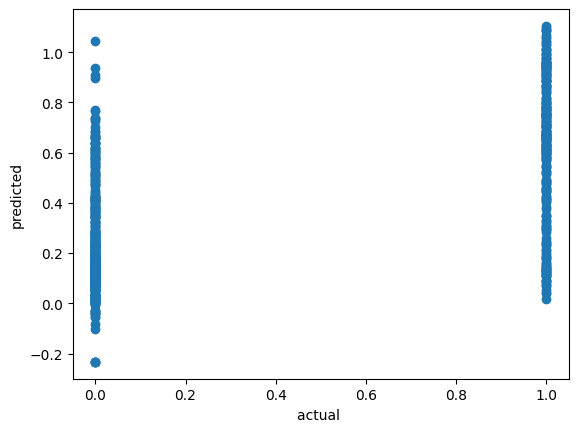

In [57]:
plt.scatter(y_train, y_pred_train)
plt.xlabel("actual ")
plt.ylabel("predicted")
plt.show()

In [58]:
from sklearn.metrics import r2_score

In [59]:
r2_score(y_train, y_pred_train)

0.39166798021078153

In [27]:
test_data = pd.read_csv('test.csv')

In [28]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [29]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [30]:
print(f"{round(test_data.Age.isna().sum()/raw_data.shape[0] * 100.0, 2)}% missing age data")

9.65% missing age data


In [31]:
t_nans = np.where(test_data.Age.isna())[0]
t_nans

array([ 10,  22,  29,  33,  36,  39,  41,  47,  54,  58,  65,  76,  83,
        84,  85,  88,  91,  93, 102, 107, 108, 111, 116, 121, 124, 127,
       132, 133, 146, 148, 151, 160, 163, 168, 170, 173, 183, 188, 191,
       199, 200, 205, 211, 216, 219, 225, 227, 233, 243, 244, 249, 255,
       256, 265, 266, 267, 268, 271, 273, 274, 282, 286, 288, 289, 290,
       292, 297, 301, 304, 312, 332, 339, 342, 344, 357, 358, 365, 366,
       380, 382, 384, 408, 410, 413, 416, 417])

In [32]:
for i in t_nans:
  test_data.Age[i] = test_data.Age.mean()

<ipython-input-32-8be5b814cef8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.Age[i] = test_data.Age.mean()


In [33]:
print(f"{round(test_data.Age.isna().sum()/raw_data.shape[0] * 100.0, 2)}% missing age data")

0.0% missing age data


In [34]:
columns_dr = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']
x_test = test_data[columns_dr]
x_test.head()

,Pclass,Sex,Age,SibSp,Parch
0,3,male,34.5,0,0
1,3,female,47.0,1,0
2,2,male,62.0,0,0
3,3,male,27.0,0,0
4,3,female,22.0,1,1


In [35]:
x_test['Sex'] = x_test['Sex'].astype('category')
x_test['Sex'] = x_test['Sex'].cat.codes

<ipython-input-35-fc7d6c5db97e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['Sex'] = x_test['Sex'].astype('category')
<ipython-input-35-fc7d6c5db97e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['Sex'] = x_test['Sex'].cat.codes


In [36]:
x_test.head()

,Pclass,Sex,Age,SibSp,Parch
0,3,1,34.5,0,0
1,3,0,47.0,1,0
2,2,1,62.0,0,0
3,3,1,27.0,0,0
4,3,0,22.0,1,1


In [37]:
y_pred_test = lr.predict(x_test)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Fare


In [ ]:
plt.scatter(range(len(y_pred_test)), y_pred_test)
plt.xlabel("actual ")
plt.ylabel("predicted")
plt.show()